In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# notable numbers
times = [[11, 11], [14, 14],  [10, 10], [12, 48], [22, 22], [13, 45], [10, 10], [9, 48], [22, 22]]
#times = [[11, 11], [14, 14], [12, 34], [10, 10], [13, 48], [22, 22], [13, 45], [10, 10], [9, 48], [22, 22]]
#predictions = [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]  # 1 = notable, 0 = not notable

predictions = [1, 1, 1, 0, 1, 0, 1, 0, 1]  # 1 = notable, 0 = not notable

dataset = tf.data.Dataset.from_tensor_slices((times, predictions))

model = tf.keras.Sequential([
    layers.Input(shape=(2,)),  # 2 input features: hour and minute
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid') #  probability of being notable
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(dataset.batch(2), epochs=50)

test_times = [[10, 10], [15, 15], [12, 34], [10, 31], [11, 34]]

test_times_array = np.array(test_times)
predictions = model.predict(test_times_array)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2708 - loss: 1.3930   
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2708 - loss: 1.1498    
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2708 - loss: 0.9388    
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2708 - loss: 0.7544    
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2708 - loss: 0.6012     
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4789
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3848 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3143
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2619 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2229 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1934 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - lo

In [35]:
rounded_predictions = np.round(predictions)
print(rounded_predictions)

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]]


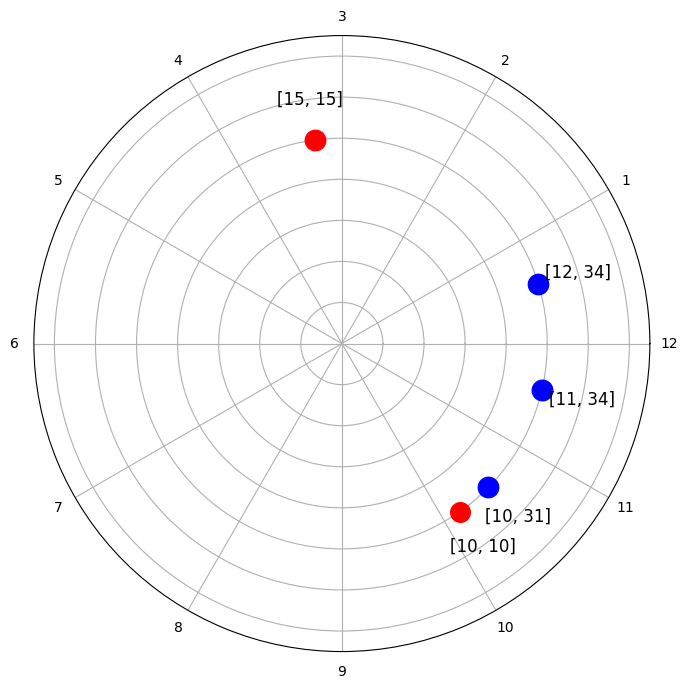

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def time_to_angle(time_list):
    hour, minute = time_list
    return (hour % 12 + minute / 60) * 30

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

for time, prediction in zip(test_times, predictions):
    angle = np.deg2rad(time_to_angle(time))
    radius = 1
    color = 'red' if prediction > 0.5 else 'blue'
    ax.plot(angle, radius, 'o', color=color, markersize = 15 * (1 - prediction) if prediction < 0.5 else 15 * prediction)

ax.set_ylim(0, 1.5)  # Set radius limit
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))  # 12-hour marks
ax.set_xticklabels(['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
ax.set_yticklabels([])


for time, prediction in zip(test_times, predictions):
    angle = np.deg2rad(time_to_angle(time))
    ax.text(angle, 1.2, time, horizontalalignment='center', verticalalignment='center', fontsize=12)

# Show the plot
plt.show()
